In [32]:
import torch
import pytorch_lightning as pl
import numpy as np
import wandb
import random

from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# optimization hyperparameter that we set in the notebook
MAX_EPOCHS = 100

# Data generation

In [18]:
sample_size = 500
dim_size = 20
ratio_dependent_variables = 0.3

# dimension size
sample_x = np.random.normal(loc=10, scale=1, size=(sample_size, dim_size))
sample_y = np.random.normal(loc=10, scale=1, size=(sample_size, dim_size))

# the number of dimensions to be replaced
n_replaced = int(dim_size * ratio_dependent_variables)
dim_ground_truth = random.sample(range(0, dim_size), k=n_replaced)

# transformation equation
for dim_replace in dim_ground_truth:
    y_value = np.random.normal(loc=20, scale=1, size=(sample_size,))
    sample_y[:, dim_replace] = y_value
# end for

x_tensor = torch.tensor(sample_x)
y_tensor = torch.tensor(sample_y)

Text(0.5, 0.98, 'Feautres to be detected: [1, 7, 12, 13, 15, 17]')

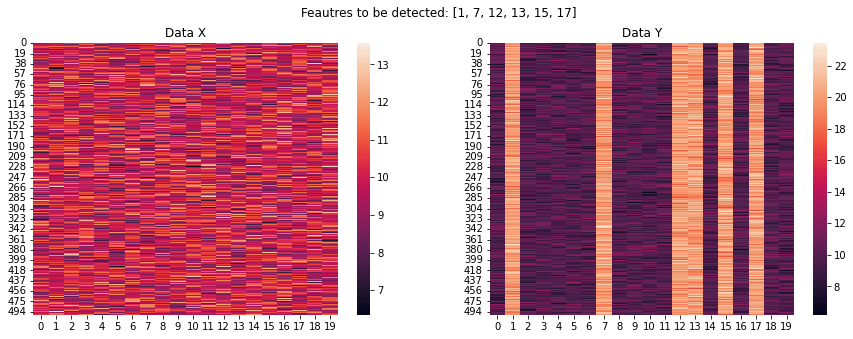

In [21]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
sns.heatmap(sample_x, ax=ax[0])
sns.heatmap(sample_y, ax=ax[1])
ax[0].set_title("Data X")
ax[1].set_title("Data Y")
fig.suptitle(f"Feautres to be detected: {sorted(dim_ground_truth)}")

# Variable Detection Trainer with a fixed regularization parameter

In [22]:
from mmd_tst_variable_detector.mmd_estimator import (QuadraticMmdEstimator, LinearMmdEstimator, MmdValues)
from mmd_tst_variable_detector.kernels.gaussian_kernel import (QuadraticKernelGaussianKernel, LinearGaussianKernel)
from mmd_tst_variable_detector.variable_trainer import (MmdVariableTrainer, TrainingParameters, TrainingResult, RegularizationParameter)
from mmd_tst_variable_detector.datasets.simple import SimpleDataset
from mmd_tst_variable_detector import DEFAULT_EARLY_STOPPING_FULL_BATCH

In [23]:
my_dataset = SimpleDataset(x_tensor, y_tensor)

In [39]:
parameters = TrainingParameters(
    batch_size=sample_size,
    regularization_parameter=RegularizationParameter(0.001, 0.0))

In [25]:
# set kernel function
initial_ard = torch.ones(my_dataset.get_dimension_flattened()[0])
kernel = QuadraticKernelGaussianKernel(ard_weights=initial_ard)
kernel.compute_length_scale_dataset(my_dataset)
kernel.set_length_scale()
# set MMD estimator
mmd_estimator = QuadraticMmdEstimator(kernel)

var_trainer = MmdVariableTrainer(mmd_estimator=mmd_estimator, training_parameter=parameters, dataset_train=my_dataset, dataset_validation=my_dataset)
trainer = pl.Trainer(
    max_epochs=MAX_EPOCHS,
    precision=32,
    callbacks=DEFAULT_EARLY_STOPPING_FULL_BATCH
)
trainer.fit(var_trainer)
trained_var = var_trainer.get_trained_variables()
assert isinstance(trained_var, TrainingResult)

/home/kensuke-mi/dev-home/.cache/pypoetry/virtualenvs/mmd-tst-variable-detector-p3E6D4h7-py3.10/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'mmd_estimator' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['mmd_estimator'])`.
  rank_zero_warn(
/home/kensuke-mi/dev-home/.cache/pypoetry/virtualenvs/mmd-tst-variable-detector-p3E6D4h7-py3.10/lib/python3.10/site-packages/lightning_fabric/accelerators/cuda.py:235: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/kensuke-mi/dev-home/.cache/pypoetry/virtualenvs/mmd-tst-variable-detector-p3E6D4h7-py3.10/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, u

Sanity Checking: 0it [00:00, ?it/s]

/home/kensuke-mi/dev-home/.cache/pypoetry/virtualenvs/mmd-tst-variable-detector-p3E6D4h7-py3.10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/kensuke-mi/dev-home/.cache/pypoetry/virtualenvs/mmd-tst-variable-detector-p3E6D4h7-py3.10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/kensuke-mi/dev-home/.cache/pypoetry/virtualenvs/

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

/home/kensuke-mi/dev-home/.cache/pypoetry/virtualenvs/mmd-tst-variable-detector-p3E6D4h7-py3.10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/logger_connector/result.py:212: UserWarning: You called `self.log('epoch', ...)` in your `on_validation_epoch_end` but the value needs to be floating point. Converting it to torch.float32.
  warning_cache.warn(
/home/kensuke-mi/dev-home/.cache/pypoetry/virtualenvs/mmd-tst-variable-detector-p3E6D4h7-py3.10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/logger_connector/result.py:212: UserWarning: You called `self.log('epoch', ...)` in your `on_train_epoch_end` but the value needs to be floating point. Converting it to torch.float32.
  warning_cache.warn(


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


In [28]:
res = var_trainer.evaluate_trained_variables(trained_result=trained_var, ground_truth_index=torch.tensor(dim_ground_truth))
res

/home/kensuke-mi/dev-home/.cache/pypoetry/virtualenvs/mmd-tst-variable-detector-p3E6D4h7-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


EvaluationVariableDetection(precision=0.3, recall=1.0, f1=0.4615384615384615)

<Axes: title={'center': 'Optimized ARD weights'}>

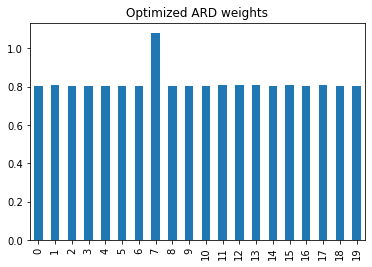

In [38]:
pd.Series(trained_var.ard_weights_kernel_k).plot.bar(title='Optimized ARD weights')

# Variable Detection Trainer with the stability selection algorithm

In [40]:
from mmd_tst_variable_detector.datasets import SimpleDataset
from mmd_tst_variable_detector.kernels.gaussian_kernel import QuadraticKernelGaussianKernel
from mmd_tst_variable_detector.mmd_estimator import QuadraticMmdEstimator
from mmd_tst_variable_detector.stability_selection_trainer import (
    StabilitySelectionTrainedParameter,
    StabilitySelectionAlgorithmParameter,
    StabilitySelectionParameters,
    DistributedComputingParameter,
    TrainingParameters,
    StabilitySelectionVariableTrainer,
    WandbLoggerParameter
)
from mmd_tst_variable_detector.utils.checkpoint_saver import CheckPointSaverStabilitySelection

In [41]:
# Parameters
candidate_regularization_parameter = [RegularizationParameter(0.01, 0.0), RegularizationParameter(0.0, 0.01)]
algorithm_param = StabilitySelectionAlgorithmParameter(
    candidate_regularization_parameter=candidate_regularization_parameter,
    n_subsampling=5
)
dist_param = DistributedComputingParameter(
    dask_scheduler_address=None,
    n_joblib=2)
base_train_param = TrainingParameters(
    batch_size=10)

wandb_logger = wandb.init(
    project='mmd-tst-variable-detector',
    name='example-stability-selection',
    dir='/tmp/mmd-tst-variable-detector')
wandb_param = WandbLoggerParameter(is_wandb_aggregated_log=True, wandb_logger=wandb_logger)

ss_param = StabilitySelectionParameters(
    algorithm_parameter=algorithm_param,
    base_training_parameter=base_train_param,
    dist_parameter=dist_param,
    computation_backend='joblib',  # joblib or dask
    wandb_logger_parameter=wandb_param
)

In [42]:
my_dataset = SimpleDataset(x_tensor, y_tensor)
# set kernel function
initial_ard = torch.ones(my_dataset.get_dimension_flattened()[0])
kernel = QuadraticKernelGaussianKernel(ard_weights=initial_ard)
kernel.compute_length_scale_dataset(my_dataset)
kernel.set_length_scale()
# set MMD estimator
mmd_estimator = QuadraticMmdEstimator(kernel)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


TypeError: unsupported operand type(s) for /: 'NoneType' and 'str'

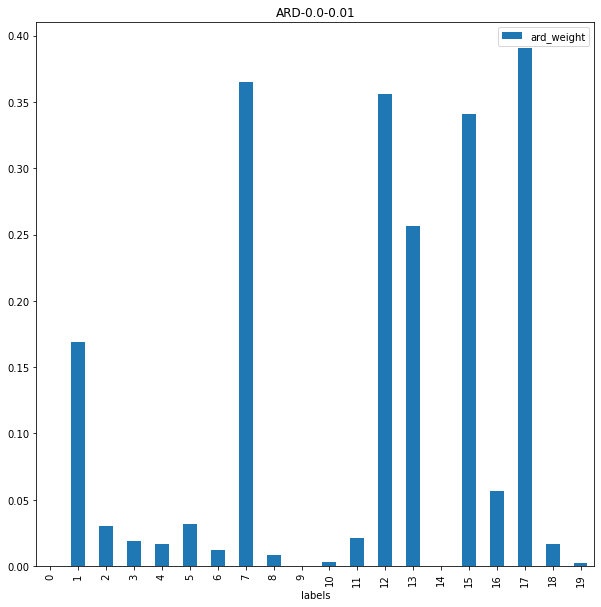

In [44]:
trainer_lightning = pl.Trainer(max_epochs=MAX_EPOCHS, accelerator='cpu', callback=DEFAULT_EARLY_STOPPING_FULL_BATCH)
__tmp = Path('/tmp/mmd-tst-variable-detector')
__tmp.mkdir()
resume_checkpoint_saver = CheckPointSaverStabilitySelection(output_dir=__tmp)

ss_trainer = StabilitySelectionVariableTrainer(
    trainer_lightning=trainer_lightning,
    training_parameter=ss_param,
    estimator=mmd_estimator,
    training_dataset=my_dataset,
    validation_dataset=my_dataset,
    resume_checkpoint_saver=resume_checkpoint_saver
)
ss_result = ss_trainer.run_stability_selection()

In [45]:
from mmd_tst_variable_detector.utils import utils_visualization

utils_visualization.visualize_stability_score_modifications(
    stability_selection_result=ss_result,
    checkpoint_saver=resume_checkpoint_saver
)

NameError: name 'ss_result' is not defined